In [1]:
%load_ext autoreload
%autoreload 2

from scipy.optimize import curve_fit
from scipy.stats import chisquare
from scipy.stats import gamma, expon
import matplotlib.pyplot as plt
import numpy as np


%run ana_script.py

/Users/astasik/.local/lib/python3.7/site-packages/elephant/spade.py:81: UserWarning: fim.so not found in elephant/spade_src folder,you are using the python implementation of fast fca
  'fim.so not found in elephant/spade_src folder,' +


Loading dumped data from dumps/blue.pickle
Loading dumped data from dumps/green.pickle
Loading dumped data from dumps/grey.pickle
Loading dumped data from dumps/orange.pickle
Loading dumped data from dumps/purple.pickle
Loading dumped data from dumps/red.pickle
Performing the ISI fitting analysis


/Users/astasik/anaconda3/envs/neuroscience/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 1000x1000 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Performing the ISI fitting analysis


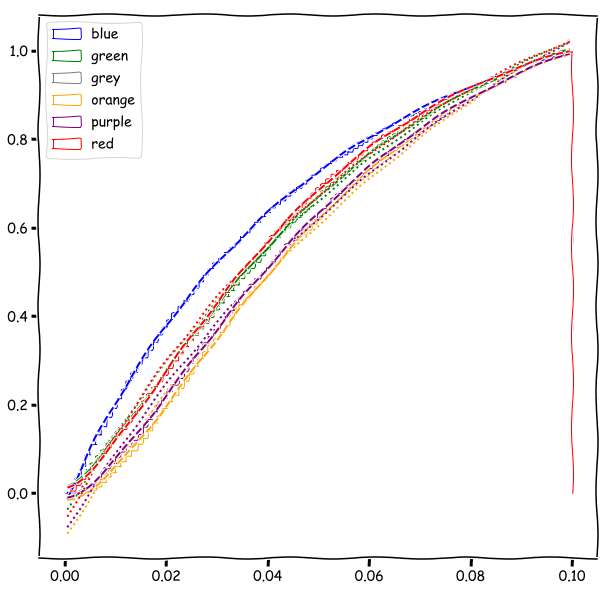

In [49]:
def exp_func(x, a, b, c):
	res = a * expon.cdf(x, loc=0, scale=b) + c
	return res

def gamma_func(x, a, c, d, e):
	res = e * gamma.cdf(x, a, loc=0, scale=c) + d
	return res


def compute_isi_fits(all_data):
	print('Performing the ISI fitting analysis')

	plt.xkcd()
	plt.figure(figsize=(10, 10))
	for d in all_data:
		bins = np.linspace(0, 0.1, 100)
		# bins = 2500
		h = plt.hist(all_data[d]['isi'], histtype='step', density=1, cumulative=1, bins=bins, label=d, color=d)
		H = h[0]
		b = (h[1][:-1]+h[1][1:]) / 2.
		popt, pcov = curve_fit(exp_func, b, H)
		plt.plot(b, exp_func(b, *popt), color=d, ls=':')
		all_data[d]['exp_diff_fit'] = np.sum((H - exp_func(b, *popt))**2.)

        
		popt, pcov = curve_fit(gamma_func, b, H)
		plt.plot(b, gamma_func(b, *popt), color=d, ls='--')
		all_data[d]['gamma_diff_fit'] = np.sum((H - gamma_func(b, *popt))**2.)

	# plt.xlim(0, 0.1)
# 	plt.ylim(1.e0, None)
	plt.legend(loc='best')
	plt.savefig('plots/isi_fit.pdf')
	plt.savefig('plots/isi_fit.png')
	plt.show()
compute_isi_fits(all_data)


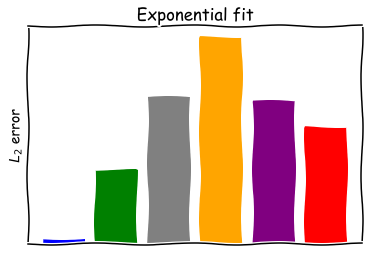

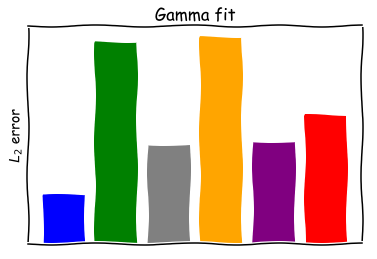

In [50]:
plt.figure()
for i, d in enumerate(all_data):
	plt.bar(i, all_data[d]['exp_diff_fit'], color=d)
plt.ylabel(r'$L_2$ error')
plt.xticks([])
plt.yticks([])
plt.title('Exponential fit')
plt.savefig('plots/isi_poisson_fit.pdf')
plt.savefig('plots/isi_poisson_fit.png')
plt.show()
    
plt.figure()
for i, d in enumerate(all_data):
	plt.bar(i, all_data[d]['gamma_diff_fit'], color=d)
plt.ylabel(r'$L_2$ error')
plt.xticks([])
plt.yticks([])
plt.title('Gamma fit')
plt.savefig('plots/isi_gamma_fit.pdf')
plt.savefig('plots/isi_gamma_fit.png')
plt.show()


In [ ]:
# import sklearn as skl
# from sklearn.decomposition import MiniBatchDictionaryLearning, DictionaryLearning

In [ ]:
# X_train = (all_data['red']['spike_raster']).reshape(142, 156, 50, -1)

In [ ]:
# X = all_data['red']['spike_raster']

In [ ]:
# X_train = X.reshape(142*100, 156, 50)
# X_train = X_train - np.mean(X_train, axis=(1,2), keepdims=True)

In [ ]:
# dico = MiniBatchDictionaryLearning(n_components=200, alpha=1, n_iter=100)
# d = dico.fit(X_train).components_